##### **Sprawozdanie lab5 Krzysztof Kucaba**

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.optimize
import time
import functools
import operator

<a id='zad1'></a>
***Zadanie 1.***  

In [3]:
A=[[1,1],[1,1.0001]]
b1=[2,2.0001]
b2=[2,2]


print("Ax=b1")
print("x1=1, x2=1")
print("\nAx=b2")
print("x1=2, x2=0")

print('\ncond(A)  {:.4f}'.format(np.linalg.cond(A)))

Ax=b1
x1=1, x2=1

Ax=b2
x1=2, x2=0

cond(A)  40002.0001


<a id='zad2'></a>
***Zadanie 2.*** 

In [4]:
H =[[1/(i+j-1) for j in range(1,9)] for i in range(1,9)]

print('\nnorma kolumnowa  {:.4f}'.format(np.linalg.cond(H,1)))
print('norma wierszowa  {:.4f}'.format(np.linalg.cond(H,np.inf)))
print('norma spektralna  {:.4f}'.format(np.linalg.cond(H,2)))

print("\nmacierz ta jest źle uwarunkowana, błędy numeryczne przy wykorzystaniu tej macierzy bedą bardzo duże")



norma kolumnowa  33872789110.1074
norma wierszowa  33872789109.7577
norma spektralna  15257574847.1910

macierz ta jest źle uwarunkowana, błędy numeryczne przy wykorzystaniu tej macierzy bedą bardzo duże


<a id='zad3'></a>
***Zadanie 3.***  

In [5]:
t=np.linspace(0,1,num=20)

b=[math.cos(4*i) for i in t]

A=np.vander(t,len(t),increasing=True)

x=np.linalg.solve(A,b)

r1=np.linalg.norm(b-np.matmul(A,x))
print("\nnorma residuum dla solve:\n{0}\n".format(r1))

q,r=np.linalg.qr(A)
x=scipy.linalg.solve_triangular(r,np.matmul(np.matrix.transpose(q),b))

r2=np.linalg.norm(b-np.matmul(A,x))
print("\nnorma residuum dla qr x:\n{0}\n".format(r2))

x=np.linalg.lstsq(A,b)[0]

r3=np.linalg.norm(b-np.matmul(A,x))
print("\nnorma residuum dla lstsq x:\n{0}\n".format(r3))

print("jakości rozwiązań solve oraz qr są bliskie sobie, lstsq jest znacząco gorsza")


norma residuum dla solve:
3.659212394130439e-15


norma residuum dla qr x:
4.1782052831214096e-15


norma residuum dla lstsq x:
2.3692875334887135e-14

jakości rozwiązań solve oraz qr są bliskie sobie, lstsq jest znacząco gorsza


<a id='zad4'></a>
***Zadanie 4.***  

t=0.75:
czas solve: 0.003786388484666788
norma residuum: 3.351795649042692e-11

czas bicg: 0.3058599912250031
norma residuum: 0.00014880164172284923

czas gmres: 22.40011455826349
norma residuum: 0.538182384658935

-----------
t=0.5:
czas solve: 0.003263437941061653
norma residuum: 1.0887052423280117e-10

czas bicg: 0.3048586447689452
norma residuum: 7.988353175114071e-05

czas gmres: 14.230755608786172
norma residuum: 0.3593473338402118

-----------
t=0.2:
czas solve: 0.0031444997307872313
norma residuum: 1.1112271533856093e-12

czas bicg: 0.1065146422376344
norma residuum: 9.664628427161918e-05

czas gmres: 6.784107514100782
norma residuum: 0.00019214947358438077

-----------
t=0.1:
czas solve: 0.003084464253220176
norma residuum: 1.6691252252065272e-14

czas bicg: 0.004505303889011714
norma residuum: 8.822426351951468e-05

czas gmres: 0.0038128191980604242
norma residuum: 8.083027231115992e-05

-----------
t=0.05:
czas solve: 0.003061809356019296
norma residuum: 1.3733457598569632e-

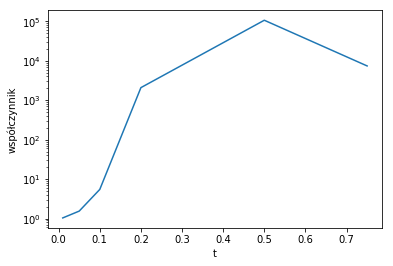

generalny trend uwarunkowania jest rosnący w zależności od t,
oznacza to że im rzadsza macierz tym lepsze jej uwarunkowanie
im gęstrza była macierz tym gorsze były wyniki wszystkich metod
czas wykonania gmres był znacząco większy dla gęstych macierzy, dla gęstych macierzy jakość wyniku była bardzo zła
solve dla wszystkich macierzy miało najlepszą jakość wyniku, im rzadsza była macierz tym dokładniejszy wynik ale rósł czas wykonania
bigc ma dosyć stałą jakość rozwiązania a czas wykonania jest gorszy dla gęstych macierzy


In [6]:
n=500

t=[0.75,0.5,0.2,0.1,0.05,0.01]

A=np.ones((n,n))
for i in range(n-1,0,-1):
    for j in range(0,i):
        s=math.sin((i+1)*(j+1)+1)
        A[i][j]=s
        A[j][i]=s
        
b=[math.cos(math.pow(i,3)+5) for i in range(0,n)]

uwar=[0 for i in t]

for k in range(0,len(t)):
    w=t[k]
    print("t={0}:".format(w))
    for i in range(n-1,0,-1):
        for j in range(0,i):
            if(abs(A[i][j])>w):
                A[i][j]=0
                A[j][i]=0
            
    uwar[k]=np.linalg.cond(A)
    
    start=time.clock()
    x=np.linalg.solve(A,b)
    timeval=time.clock()-start
    print("czas solve: {1}".format(w,timeval))
    r=np.linalg.norm(b-np.matmul(A,x))
    print("norma residuum: {0}\n".format(r))
    
    start=time.clock()
    x=scipy.sparse.linalg.bicg(scipy.sparse.csr_matrix(A),b)[0]

    timeval=time.clock()-start
    print("czas bicg: {1}".format(w,timeval))
    r=np.linalg.norm(b-np.matmul(A,x))
    print("norma residuum: {0}\n".format(r))
    
    start=time.clock()
    x=scipy.sparse.linalg.gmres(scipy.sparse.csr_matrix(A),b)[0]
    timeval=time.clock()-start
    print("czas gmres: {1}".format(w,timeval))
    r=np.linalg.norm(b-np.matmul(A,x))
    print("norma residuum: {0}\n".format(r))
    
    
    print("-----------")

t=list(reversed(t))
uwar=list(reversed(uwar))
plt.semilogy(t,uwar,label='błąd')
plt.xlabel("t")
plt.ylabel("współczynnik")
plt.show()

print("generalny trend uwarunkowania jest rosnący w zależności od t,\noznacza to że im rzadsza macierz tym lepsze jej uwarunkowanie")
print("im gęstrza była macierz tym gorsze były wyniki wszystkich metod")
print("czas wykonania gmres był znacząco większy dla gęstych macierzy, dla gęstych macierzy jakość wyniku była bardzo zła")
print("solve dla wszystkich macierzy miało najlepszą jakość wyniku, im rzadsza była macierz tym dokładniejszy wynik ale rósł czas wykonania")
print("bigc ma dosyć stałą jakość rozwiązania a czas wykonania jest gorszy dla gęstych macierzy")


<a id='zad5'></a>
***Zadanie 5.***  

In [7]:
def gauss(A,b,ite=15):
    n=len(b)
    A=list(A)
    x=[0 for i in range(n)]

    for loop in range(ite):
        
        for i in range(n):
            x[i]=(+b[i] -sum([A[i][j]*x[j] for j in range(0,i)])-sum([A[i][j]*x[j] for j in range(i+1,n)]))/A[i][i]
        
    return x

A = [[10., -1., 2., 0.],
       [-1., 11., -1., 3.],
       [2., -1., 10., -1.],
       [0.0, 3., -1., 8.]]
b = [6., 25., -11., 15.]

x=gauss(A,b)

r=b-np.matmul(A,x)
print("metoda Gaussa-Seidla:")
print("rozwiązanie: {0}".format(x))
print("residuum: {0}".format(r))

x2=np.linalg.solve(A,b)
r2=b-np.matmul(A,x2)
print("\nsolve:")
print("rozwiązanie: {0}".format(x2))
print("residuum: {0}".format(r2))

print("\ndokładność metody Gaussa-Seidla zależy od liczby iteracji")


A=[[1,2,3],[2,1,3],[3,2,1]]
b=[1,2,0]
print("\ndla zadanej macierzy:")
x=gauss(A,b)
r=b-np.matmul(A,x)
print("metoda Gaussa-Seidla:")
print("rozwiązanie: {0}".format(x))
print("residuum: {0}".format(r))

x2=np.linalg.solve(A,b)
r2=b-np.matmul(A,x2)
print("\nsolve:")
print("rozwiązanie: {0}".format(x2))
print("residuum: {0}".format(r2))

print("\nzadana macierz nie spełnia warunków działania metody Gaussa-Seidla\nodwzorowanie zadane macierzą A nie jest zwężające" )

metoda Gaussa-Seidla:
rozwiązanie: [0.999999999999997, 1.9999999999999998, -0.9999999999999991, 1.0000000000000002]
residuum: [  2.84217094e-14   0.00000000e+00  -3.55271368e-15   0.00000000e+00]

solve:
rozwiązanie: [ 1.  2. -1.  1.]
residuum: [ 0.  0.  0.  0.]

dokładność metody Gaussa-Seidla zależy od liczby iteracji

dla zadanej macierzy:
metoda Gaussa-Seidla:
rozwiązanie: [1303595803.0, -2601324252.0, 1291861095.0]
residuum: [  2.34694170e+07  -3.88145064e+09   0.00000000e+00]

solve:
rozwiązanie: [ 0.25 -0.75  0.75]
residuum: [ -2.22044605e-16   0.00000000e+00   0.00000000e+00]

zadana macierz nie spełnia warunków działania metody Gaussa-Seidla
odwzorowanie zadane macierzą A nie jest zwężające
